# Machine learning models for comparison


## Overview

This notebook contains the training and evaluating of 5 machine learning models for comparison.  



### Traing for 5 machine learing models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.colors as colors
from scipy import stats
from datetime import datetime
import time

# Below imports are used to print out pretty pandas dataframes
from IPython.display import display, HTML


In [20]:
import tensorflow as tf
import os
# 选择编号为0的GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import pandas 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from tensorflow.keras.callbacks import TensorBoard


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


train_data = np.load("../../Data/traindata.npy")
test_data = np.load("../../Data/testdata.npy")

X = train_data[:,0:31]
Y = train_data[:,31]
test_X =  test_data[:,0:31]
test_Y = test_data[:,31]





#### SVR

In [8]:
# Load SVR model algorithm library
from sklearn.svm import SVR

# Create SVR regression model object
clf = SVR(
          C=1.0, # The larger the parameter C in SVC, the smaller the error for the training set, but it is easy to over fit; The smaller the C, the more misclassification of the training set is allowed, which is equivalent to the soft margin
          cache_size=200, # Specifies the size of the kernel cache in MB.
          coef0=0.0, # Independent terms in kernel functions. It is only important in 'poly' and 'sigmoid'.
          epsilon=0.1, # epsilon-tube
          gamma='auto', # auto = 1/ n_features，
          kernel='rbf', # Specifies the kernel type to use in the algorithm。'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'or 'callable'
          max_iter=-1, # Hard limit of iterations within the solver, or unlimited - 1
          shrinking=True, # Whether to use shrink heuristics.
          tol=0.001,  # Residual convergence condition
          verbose=True#  Enable detailed output.
         )
# Training SVR regression model with training set
clf.fit(X, Y) 


[LibSVM]

SVR(gamma='auto', verbose=True)

In [9]:
import joblib
joblib.dump(clf, "svr.m")
print ("Done\n")

Done



####  DecisionTreeRegressor

In [14]:
from sklearn.tree import  DecisionTreeRegressor 

clf = DecisionTreeRegressor()
clf = clf.fit(X, Y)



In [32]:
import joblib
joblib.dump(clf, "DTree.m")
print ("Done\n")

Done



####  KNeighborsRegressor

In [16]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 
import joblib
joblib.dump(neigh, "KNN.m")
print ("Done\n")

Done



####  RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
regr =  RandomForestRegressor(random_state=0, n_estimators=10)

In [17]:
regr.fit(X, Y)
print(regr.feature_importances_)

[2.59514504e-01 1.17888599e-02 2.49640809e-02 1.77841225e-02
 1.43728863e-02 1.72568246e-02 1.95884700e-02 1.97620054e-02
 6.21580243e-03 2.42801804e-04 1.72283543e-03 3.97024942e-03
 2.18303305e-03 3.81500242e-03 5.38078011e-03 1.35194583e-01
 1.18767609e-02 2.41235597e-02 1.71720791e-02 1.51790688e-02
 1.96566469e-02 2.08592705e-02 1.97571278e-02 2.01732148e-01
 1.10093933e-02 2.52553441e-02 1.67072359e-02 1.49255330e-02
 1.84577740e-02 1.98942117e-02 1.96370048e-02]


In [27]:
import joblib
joblib.dump(regr, "RF.m")
print ("Done\n")

Done



####  XGBRegressor

In [35]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
                             learning_rate = 0.01,
                             n_estimators = 1000,
                             objective = 'reg:linear',
                             n_jobs = -1)

xgb_model.fit(X,Y,
              eval_set=[(X, Y)], 
              eval_metric='logloss',
              verbose=100)



[10:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-logloss:-5675.06055
[100]	validation_0-logloss:-5675.43311
[200]	validation_0-logloss:-5675.43311
[300]	validation_0-logloss:-5675.43311
[400]	validation_0-logloss:-5675.43311
[500]	validation_0-logloss:-5675.43311
[600]	validation_0-logloss:-5675.43311
[700]	validation_0-logloss:-5675.43311
[800]	validation_0-logloss:-5675.43311
[900]	validation_0-logloss:-5675.43311
[999]	validation_0-logloss:-5675.43311


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [36]:
import joblib
joblib.dump(xgb_model, "xgb.m")
print ("Done\n")

Done



###  Evaluation for 5 machine learing models

In [21]:
import joblib
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
np.set_printoptions(suppress=True)
def valuateMachineLearning(m_type):
    model = joblib.load("{}.m".format(m_type))
    print ("Load Model Done\n")
    train_data = np.load("../../Data/traindata.npy")
    test_data = np.load("../../Data/testdata.npy")

    X = train_data[:,0:31]
    Y = train_data[:,31]
    test_X =  test_data[:,0:31]
    test_Y = test_data[:,31]
    print("[INFO] predicting glc_after...")
    pred_test_y = model.predict(test_X)
    print(pred_test_y[0:10])
    print(test_Y[0:10])
        
    print("[INFO] predicting glc_after in trainset...")
    pred_train_y = model.predict(X)
    print(pred_train_y[10:20])
    print(Y[10:20])


    #r2
    pred_acc = r2_score(test_Y, pred_test_y)
    print('pred_acc_r2',pred_acc)
    train_acc = r2_score(Y, pred_train_y)
    print('train_acc_r2',train_acc)
    #mae
    pred_acc = mean_absolute_error(test_Y, pred_test_y)
    print('pred_acc_mae',pred_acc)
    train_acc = mean_absolute_error(Y, pred_train_y)
    print('train_acc_mae',train_acc)    
    #mse
    pred_acc = mean_squared_error(test_Y, pred_test_y)
    print('pred_acc_mse',pred_acc)
    train_acc = mean_squared_error(Y, pred_train_y)
    print('train_acc_mse',train_acc)
    #rmse
    print('pred_acc_rmse',pred_acc**0.5)
    print('train_acc_rmse',train_acc**0.5)
    
    print('pred_ceg_percentage:')
    get_CEG_percentage(test_Y,pred_test_y)
    print('train_ceg_percentage:')
    get_CEG_percentage(Y,pred_train_y)
    
    print('pred_CEG')
    draw_CEG_grid(test_Y,pred_test_y)
    
    
def get_CEG_percentage(test_Y,pred_test_y):
    total = test_Y.shape[0]
    re = np.zeros(5)
    for i in range(total):
        if (pred_test_y[i]<=70 and test_Y[i]<=70) or (pred_test_y[i]<=1.2*test_Y[i] and pred_test_y[i] >= 0.8*test_Y[i]):
            re[0] = re[0] + 1       #Zone A
        elif (test_Y[i]>=180 and pred_test_y[i]<=70) or (test_Y[i]<=70 and  pred_test_y[i]>=180):
            re[4] = re[4] + 1      # Zone E
        elif ((test_Y[i] >= 70 and test_Y[i] <= 290) and (pred_test_y[i] >= test_Y[i] + 110) ) or ((test_Y[i] >= 130 and test_Y[i] <= 180)and (pred_test_y[i] <= (7/5)*test_Y[i] - 182)):
            re[2] = re[2] + 1       # Zone C
        elif (( test_Y[i] >= 240) and ((pred_test_y[i] >= 70) and (pred_test_y[i] <= 180))) or (test_Y[i] <= 175/3 and (pred_test_y[i] <= 180) and (pred_test_y[i] >= 70)) or ((test_Y[i] >= 175/3 and test_Y[i] <= 70) and (pred_test_y[i] >= (6/5)*test_Y[i])):
            re[3] = re[3] + 1      # Zone D
        else:
            re[1] = re[1] + 1      # Zone B
    print(re)
    #print(total)
    percentage = re/total*100;
    print(percentage)

def draw_CEG_grid(test_Y,pred_test_y):
    plt.figure(figsize=(6,6))
    plt.xlabel('Reference Concentration [mg/dl]');
    plt.ylabel ('Predicted Concentration [mg/dl]');
    plt.title('Clarke''s Error Grid Analysis');
    plt.xlim(0,400)
    plt.ylim(0,400)
    plt.scatter(test_Y,pred_test_y, s=10, c="k", marker='o',alpha=0.2);

    plt.plot([0,400],[0,400],'k:')                  
    plt.plot([0,175/3],[70,70],'k-')
    plt.plot([175/3,400/1.2],[70,400],'k-')        
    plt.plot([70,70],[84,400],'k-')
    plt.plot([0,70],[180,180],'k-')
    plt.plot([70,290],[180,400],'k-') 
    plt.plot([70,70],[0,56],'k-')                  
    plt.plot([70,400],[56,320],'k-')
    plt.plot([180,180],[0,70],'k-')
    plt.plot([180,400],[70,70],'k-')
    plt.plot([240,240],[70,180],'k-')
    plt.plot([240,400],[180,180],'k-')
    plt.plot([130,180],[0,70],'k-')      
    plt.text(30,20,'A', fontsize=12)
    plt.text(30,150,'D', fontsize=12)
    plt.text(30,380,'E', fontsize=12)
    plt.text(150,380,'C', fontsize=12)
    plt.text(160,20,'C', fontsize=12)
    plt.text(380,20,'E', fontsize=12)
    plt.text(380,120,'D', fontsize=12)
    plt.text(380,260,'B', fontsize=12)
    plt.text(280,380,'B', fontsize=12)
    plt.show()

    
    

Load Model Done

[INFO] predicting glc_after...
[128.05218232 183.00145619 138.5698272  190.11518624 150.1053168
 125.42690012 153.15810128 214.47278742 156.03284522 121.79871126]
[118. 217. 131. 255. 190. 135. 141. 218. 138. 103.]
[INFO] predicting glc_after in trainset...
[150.03577562 131.06267728 154.62593756 145.04686631 143.85235113
 123.1876908  123.83102792 175.06264961 139.23677965 145.7597229 ]
[185. 114. 166. 143. 134. 111. 141. 202. 126. 153.]
pred_acc_r2 0.5503728037774744
train_acc_r2 0.5493487499071266
pred_acc_mae 25.431387806794234
train_acc_mae 25.25725375837443
pred_acc_mse 1158.396102543471
train_acc_mse 1150.7316418978053
pred_acc_rmse 34.0352185617115
train_acc_rmse 33.92243567165844
pred_ceg_percentage:
[12616.  4445.   115.   168.    22.]
[72.64770241 25.59599217  0.66221352  0.96740758  0.12668433]
train_ceg_percentage:
[50809. 17512.   423.   603.   120.]
[73.14120374 25.20909209  0.60892222  0.86803806  0.17274389]
pred_CEG


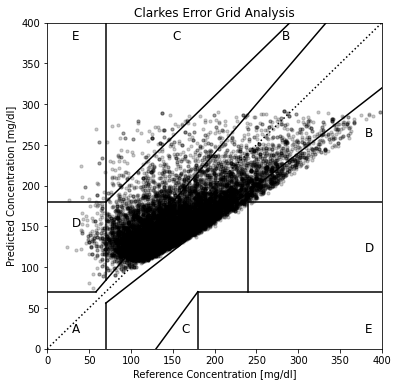

In [18]:
valuateMachineLearning("svr")

Load Model Done

[INFO] predicting glc_after...
[121.71318 184.43475 135.01088 185.64714 148.16565 117.62944 147.17213
 222.39871 158.29599 113.65263]
[118. 217. 131. 255. 190. 135. 141. 218. 138. 103.]
[INFO] predicting glc_after in trainset...
[145.27989 128.67802 141.69705 142.15082 140.31221 115.14472 117.13459
 171.85463 137.05377 135.43591]
[185. 114. 166. 143. 134. 111. 141. 202. 126. 153.]
pred_acc_r2 0.6471730707544099
train_acc_r2 0.6709098714905093
pred_acc_mae 23.08442945830712
train_acc_mae 22.263286041877436
pred_acc_mse 909.0049337411427
train_acc_mse 840.3270241323905
pred_acc_rmse 30.14970868418371
train_acc_rmse 28.988394645657607
pred_ceg_percentage:
[13372.  3759.    46.   181.     8.]
[77.00103651 21.64574456  0.26488541  1.0422665   0.04606703]
train_ceg_percentage:
[54462. 14173.   131.   674.    27.]
[78.39981574 20.40249327  0.18857875  0.97024486  0.03886738]
pred_CEG


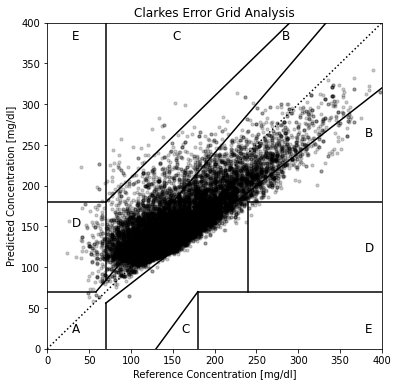

Load Model Done

[INFO] predicting glc_after...
[118.  208.  138.5 147.  191.  123.  141.  218.  133.5 103. ]
[118. 217. 131. 255. 190. 135. 141. 218. 138. 103.]
[INFO] predicting glc_after in trainset...
[185.  113.  166.  143.  134.  111.  120.5 202.  111.  153. ]
[185. 114. 166. 143. 134. 111. 141. 202. 126. 153.]
pred_acc_r2 0.8086429260163451
train_acc_r2 0.9633925254791305
pred_acc_mae 9.754779454105725
train_acc_mae 2.8814832942260353
pred_acc_mse 493.00240412299894
train_acc_mse 93.476672376812
pred_acc_rmse 22.203657449235678
train_acc_rmse 9.66833348498137
pred_ceg_percentage:
[15460.  1733.    40.   119.    14.]
[89.02453069  9.97926984  0.23033514  0.68524703  0.0806173 ]
train_ceg_percentage:
[67527.  1812.     3.   125.     0.]
[97.20730707  2.60843278  0.0043186   0.17994155  0.        ]
pred_CEG


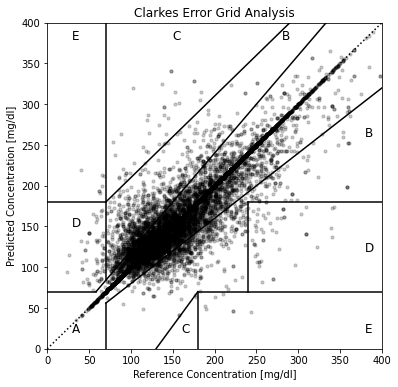

In [6]:
valuateMachineLearning("xgb")
valuateMachineLearning("KNN")

Load Model Done

[INFO] predicting glc_after...
[118.  217.  134.3 178.7 153.4 110.6 144.2 218.  141.9 104.8]
[118. 217. 131. 255. 190. 135. 141. 218. 138. 103.]
[INFO] predicting glc_after in trainset...
[185.  112.1 166.  143.  134.  111.  130.1 202.7 129.4 153. ]
[185. 114. 166. 143. 134. 111. 141. 202. 126. 153.]
pred_acc_r2 0.8868526476336802
train_acc_r2 0.9784084286245203
pred_acc_mae 8.28686513877692
train_acc_mae 3.2008910705802758
pred_acc_mse 291.5069486352643
train_acc_mse 55.133774454057324
pred_acc_rmse 17.0735745711103
train_acc_rmse 7.425212081419447
pred_ceg_percentage:
[16116.  1142.    19.    84.     5.]
[92.80202695  6.57606818  0.10940919  0.48370379  0.02879189]
train_ceg_percentage:
[68434.   882.     1.   149.     1.]
[98.51296299  1.26966761  0.00143953  0.21449033  0.00143953]
pred_CEG


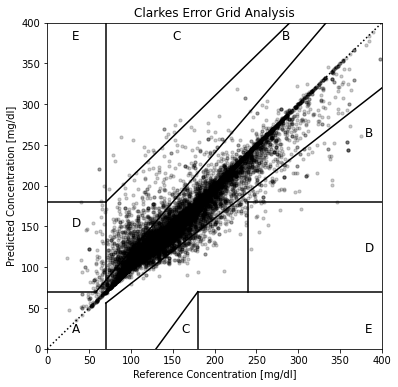

In [30]:
valuateMachineLearning("RF")

Load Model Done

[INFO] predicting glc_after...
[118. 217. 131. 223. 131. 135. 140. 218. 138. 103.]
[118. 217. 131. 255. 190. 135. 141. 218. 138. 103.]
[INFO] predicting glc_after in trainset...
[185. 114. 166. 143. 134. 111. 141. 202. 126. 153.]
[185. 114. 166. 143. 134. 111. 141. 202. 126. 153.]
pred_acc_r2 0.8440522544653077
train_acc_r2 1.0
pred_acc_mae 5.969365426695842
train_acc_mae 0.0
pred_acc_mse 401.775653575953
train_acc_mse 0.0
pred_acc_rmse 20.044342183667517
train_acc_rmse 0.0
pred_ceg_percentage:
[16106.  1140.    46.    57.    17.]
[92.74444316  6.56455142  0.26488541  0.32822757  0.09789243]
train_ceg_percentage:
[69467.     0.     0.     0.     0.]
[100.   0.   0.   0.   0.]
pred_CEG


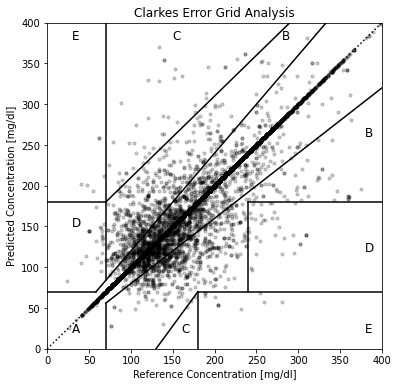

In [33]:
valuateMachineLearning("DTree")